<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/An%C3%A1lise_dos_Dados_do_Airbnb_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Dublin*

<center><img alt="Dublin" width="75%" src="https://raw.githubusercontent.com/JoaoGustavo29/Relatorios_imgs/main/trinity-college-405783_1920.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Dublin

Capital da Irlanda e um famoso destino turístico, uma metrópole cuja cultura é vibrante, um passado recheado de história. Lar da "**Trinity College**", patrimônio cultural da cidade e a mais antiga universidade da Irlanda, ela abriga uma das bibliotecas mais famosas do mundo, a **Old Library**, detentora de um manuscrito do século nove.

Contudo, não se deixe enganar, história é apenas um dos motivos para se visitar a Capital, local onde se encontra a **Guinness Storehouse**, podendo assim, agendar uma visita e conhecer o processo de fabricação da **melhor** cerveja do Planeta.

Consequentemente, podemos concordar que fazer uma viagem a Dublin não seria nada mal.

## Obtenção dos Dados

Os dados usados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Por esta ser uma análise exploratória inicial, os dados utilizados nesse projeto, são uma versão resumida do dataset.



* `listings.csv` - *Summary information and metrics for listings in Dublin (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/ireland/leinster/dublin/2020-12-17/visualisations/listings.csv')

## Análise dos Dados

Nesta etapa o objetivo é garantir um entendimento de como os dados estão estruturados, de forma que o leitor tenha consciência do que será analisado. Sendo assim, será apresentado um dicionário a respeito de cada uma das variáveis.

**Dicionário das variáveis**

* `id` - número de identificação do imóvel
* `name` - Título do anúncio da propriedade
* `host_id` - número de identificação do proprietário 
* `host_name` - nome do anfitrião
* `neighbourhood_group` - coluna sem valores válidos
* `neighbourhood` - nome do  bairro
* `latitude` - coordenada de latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type` - tipo de acomodação oferecida
* `price` - valor do aluguel
* `minimum_nights` - menor quantidade de noites para alugar
* `number_of_reviews` - número de reviews
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews em um mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de partirmos para as análises, vamos conhecer um pouco do nosso *dataset*, dando uma olhada nas 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,1.91,3,0
1,68483,Unique Central Dublin River-view,339817,John,NaN,Dublin City,53.34501,-6.26552,Entire home/apt,92,3,103,2019-08-12,0.87,1,43
2,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.05,1,348
3,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,51,3,182,2020-03-09,1.56,3,114
4,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,0.95,3,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Com algumas linhas de código, é possível notar a presença de 16 variáveis e 7894 entradas, sendo algumas delas dos tipos, inteiro, float e objeto.

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 7894
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quando buscamos um *dataset* queremos um com qualidade, é possível mensurar isso de acordo com a quantidade de valores ausentes. É necessário entender se os valores nulos são significativos comparados ao total de entradas.

* Na coluna `neighbourhood_group` é possível notar que 100% dos valores não foram inseridos
* Aproximadamente 20% dos valores das variáveis `reviews_per_month` e `last_review` são nulos
* Apenas 0,1% dos valores da variável `name` são nulos

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False) 

neighbourhood_group               1.000000
reviews_per_month                 0.193311
last_review                       0.193311
name                              0.000127
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

In [ ]:
# excluindo valores ausentes
df.drop(columns=['neighbourhood_group'], inplace=True)
df.dropna(axis=0, inplace=True)

# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para termos uma melhor visualização a respeito da distribuição das variáveis, irei plotar um histograma.

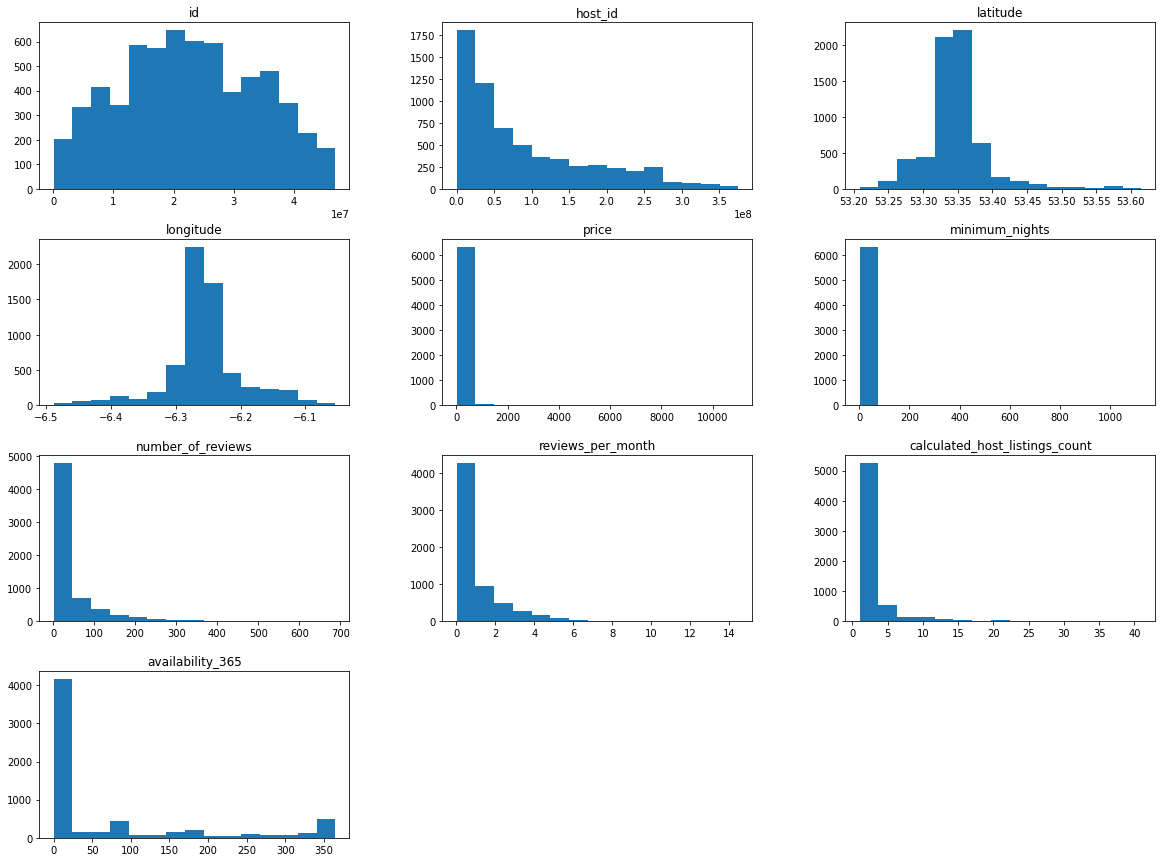

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15), grid=False);

### **Q4. Há *Outliers* presentes?**

Se prestarmos atenção na forma em como o histograma está distribuindo os dados, podemos encontrar indicativos da presença de *outliers*. É possível pegarmos como exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem a representação gráfica. Para confirmar, existem duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000
mean,122.506281,4.728015,40.018373,1.034852,2.711212,68.038474
std,359.463149,23.629984,65.424070,1.387199,3.960023,115.409901
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,3.000000,0.130000,1.000000,0.000000
50%,79.000000,2.000000,12.000000,0.460000,1.000000,0.000000
75%,126.000000,3.000000,46.000000,1.380000,2.000000,89.000000
max,10998.000000,1125.000000,688.000000,14.460000,41.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 126, porém seu valor máximo é 10998.
* O valor máximo para a variável (`minimum_nights`) está acima de 365 dias no ano.

#### **Definindo limites para 'minimum_nights'**

In [ ]:
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nigths: ', sup_minimum_nights)
print('Limite inferios de minimum_nigths: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nigths:  6.0
Limite inferios de minimum_nigths:  -2.0


#### **Boxplot para minimum_nights**

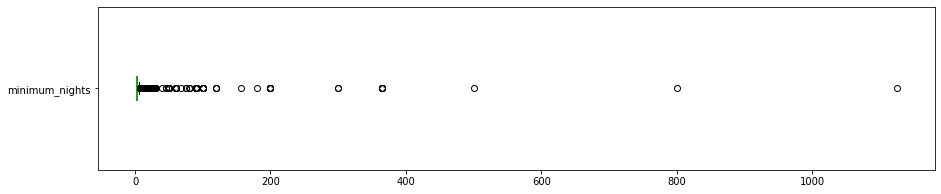

minimum_nights: valores acima de 6:
722 entradas.
11.3379%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 6 dias para minimum_nights
print('minimum_nights: valores acima de 6:')
print('{} entradas.'.format(len(df[df.minimum_nights > 6])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

Com isso podemos extrair algumas informações:

* Cerca de 722 acomodações tem um minimo acima de 6 noites
* Essas acomodações representam apenas 11.3% do *dataset*

#### **Definindo limites para 'Price'**

In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites 
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  76.0
Limite superior de price:  240.0
Limite inferior de price:  -64.0


#### **Boxplot para price**

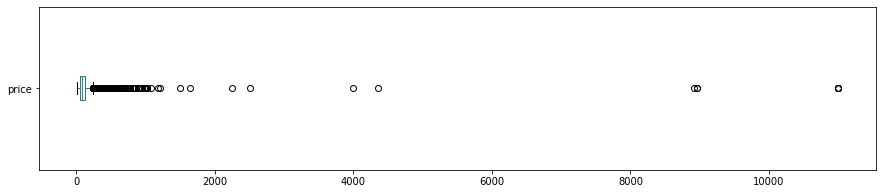


price: valores acima de 240
500 entradas
7.8518%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 240 para price
print('\nprice: valores acima de 240')
print('{} entradas'.format(len(df[df.price > 240])))
print('{:.4f}%'.format((len(df[df.price > 240]) / df.shape[0])*100))

Alguns insights tirados dessa análise :

* Existem aproximadamente 500 entradas de acomodações com valores acima de 240
* E essas acomodações representam apenas 7,8% do *dataset*

#### **Limpando o dataset**

Após identificarmos *outliers* nas variáveis `price` e `minimum_nights`, vamos limpar o *Dataset*.

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df.price > 240].index, axis=0, inplace=True)
df_clean.drop(df_clean[df.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df.minimum_nights > 6].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape depois da limpeza: ', df_clean.shape)

Shape antes da limpeza:  (6368, 15)
Shape depois da limpeza:  (5202, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


#### **Histogramas sem *outliers***

Com o Dataset limpo, irei plotar um histograma sem a presença dos outliers.

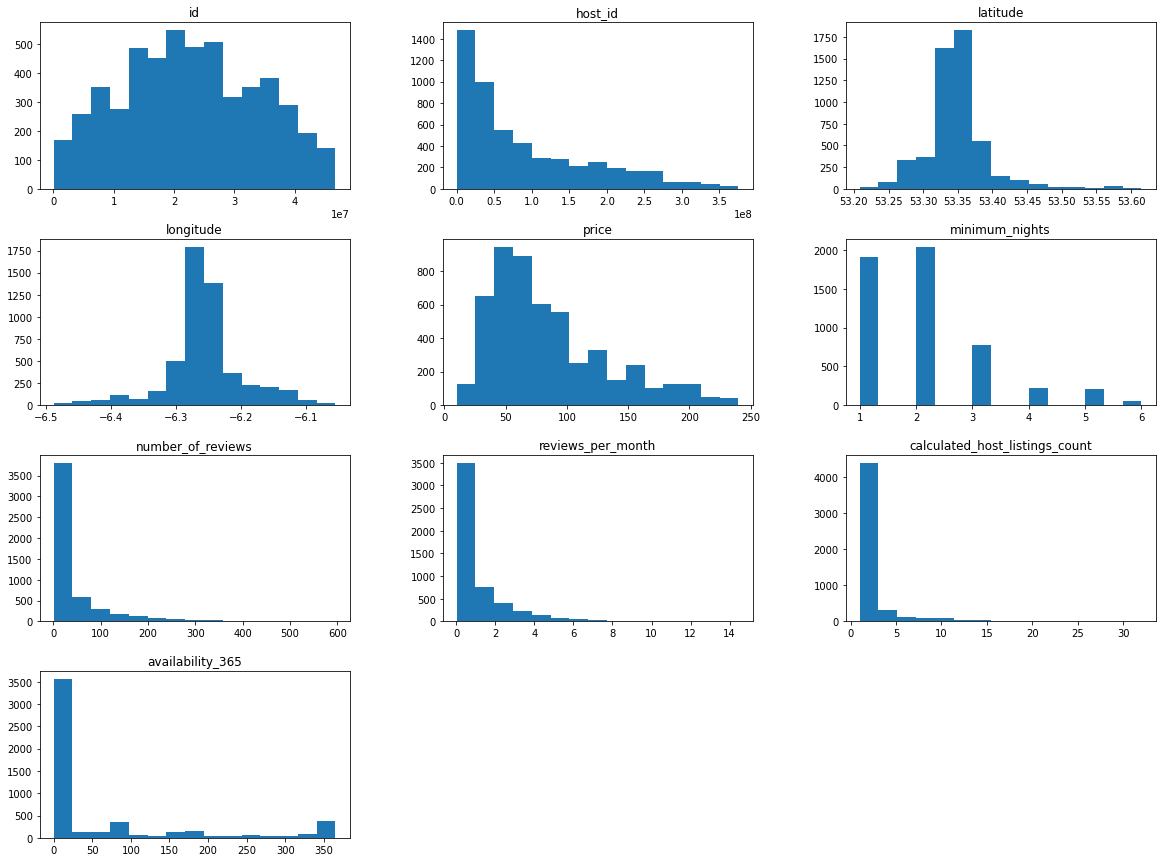

In [ ]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,15), grid=False);

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5202.0,5202.0,5202.0,5202.0,5202.0,5202.0,5202.0,5202.0,5202.0,5202.0
mean,22682123.0,88950441.1,53.3,-6.3,85.2,2.0,40.6,1.1,2.5,61.3
std,11367729.0,86006220.5,0.0,0.1,47.1,1.1,66.4,1.4,3.7,111.3
min,44077.0,43984.0,53.2,-6.5,10.0,1.0,1.0,0.0,1.0,0.0
25%,13847538.2,22189306.0,53.3,-6.3,50.0,1.0,3.0,0.1,1.0,0.0
50%,22299855.5,55006639.0,53.3,-6.3,71.0,2.0,12.0,0.5,1.0,0.0
75%,31988359.8,138695412.2,53.4,-6.2,110.0,2.0,46.0,1.4,2.0,77.0
max,46753941.0,375568846.0,53.6,-6.1,240.0,6.0,596.0,14.5,32.0,365.0


### **Q5. Qual a média dos preços de aluguel?**

Em uma análise onde temos o valor do aluguel, se torna interessante saber a média desse valor. De modo a tirar *insights* que auxiliam no cálculo do gasto com a acomodação, em uma possível viagem.

* Foi possível verificar que o valor *médio* do aluguel das acomodações é **`85,22 euros`**.


In [ ]:
# ver a média da coluna `price`
df_clean['price'].mean()

85.22549019607843

### **Q6. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No contexto da análise, podemos buscar relação ou semelhança entre duas variáveis.

Essas relações podem ser medidas, e é função do coeficiente de relação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.213105,-0.037996,-0.061857,0.041307,0.033815
minimum_nights,0.213105,1.000000,-0.084321,-0.146216,0.008910,-0.065255
number_of_reviews,-0.037996,-0.084321,1.000000,0.868201,0.020238,0.173490
reviews_per_month,-0.061857,-0.146216,0.868201,1.000000,0.052063,0.172285
calculated_host_listings_count,0.041307,0.008910,0.020238,0.052063,1.000000,0.175962
availability_365,0.033815,-0.065255,0.173490,0.172285,0.175962,1.000000


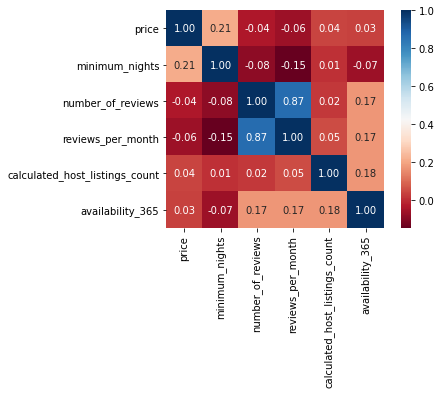

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu' , fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type`indica qual categoria de imóvel está anunciado na plataforma. No site, existem opções de apartamentos/casas inteiras, aluguel de um quarto privado ou até mesmo dividir o mesmo quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       2942
Entire home/apt    2122
Shared room          91
Hotel room           47
Name: room_type, dtype: int64

Os tipos de Imóveis que mais aparece são, em ordem:
* Quartos privados
* Casa/Apt inteiros
* Quartos compartilhados
* Quartos de Hotel

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Private room       0.461997
Entire home/apt    0.333229
Shared room        0.014290
Hotel room         0.007381
Name: room_type, dtype: float64

Os imóveis tem uma distribuição bem interessante, veja:
* `Quartos privados` e `Casas/apts inteiros` ocupam cerca de 79% dos imóveis anunciados
* E apenas 1% são `Quartos compartilhados`


### **Q7. Qual a localidade mais cara de Dublin?**

É possível verificar uma variável em função de outra, usando `groupby()`. Neste caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço do aluguel.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dublin City              88.379266
Dn Laoghaire-Rathdown    85.990177
Fingal                   70.808118
South Dublin             63.195556
Name: price, dtype: float64

Acima podemos notar que os valores médios de **Dublin City** e **Dn Laoghaire-Rathdown** são bem próximos, diferente de **Fingal** e **South Dublin** que apresentam valores mais baixos. 

Não sou um conhecedor da cidade de Dublin então não posso falar com propriedade o motivo dessa classificação das médias, mas é possível verificarmos quais bairros possuem mais imóveis anunciados, e esclarecermos a dúvida se isso se deve a quantidade de imóveis presentes em cada um dos bairros. Veja abaixo:


In [ ]:
# definindo variáveis para ver a quantidade de imóveis de cada região

dct = df_clean[df_clean.neighbourhood == 'Dublin City'].shape[0]

dlr = df_clean[df_clean.neighbourhood == 'Dn Laoghaire-Rathdown'].shape[0]

fng = df_clean[df_clean.neighbourhood == 'Fingal'].shape[0]

sd = df_clean[df_clean.neighbourhood == 'South Dublin'].shape[0]

# Imprimindo o número de imóveis em cada região
print('O número de imóveis em Dublin City é :\t {}'.format(dct))

print('O número de imóveis em Dn Laoghaire-Rathdown é :\t {}'.format(dlr))

print('O número de imóveis em Fingal é :\t {}'.format(fng))

print('O número de imóveis em South Dublin é :\t {}'.format(sd))

O número de imóveis em Dublin City é :	 3926
O número de imóveis em Dn Laoghaire-Rathdown é :	 509
O número de imóveis em Fingal é :	 542
O número de imóveis em South Dublin é :	 225


Com isso conseguimos tirar algumas conclusões:

* Dublin City é onde há mais imóveis anunciados e o mais caro
* Porém, é possível se hospedar com valores parecidos tanto em Dublin City quanto em Dn Laoghaire-Rathdown

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

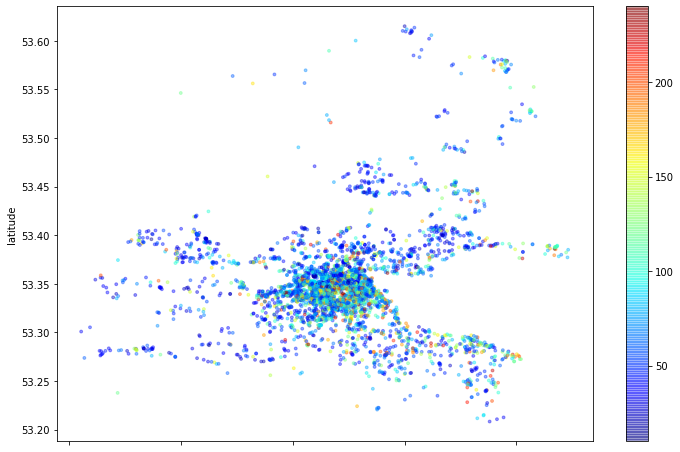

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Podemos ver que a média do mínimo de noites é 2 noites, isso nos mostra que os proprietários tendem a disponibilizar os imóveis por no mínimo 2 noites (fins de semana)

In [ ]:
# ver a média da coluna `minimum_nights`

df_clean['minimum_nights'].mean()

2.0280661284121493

## Conclusões

Neste projeto, conseguimos tirar algumas informações sobre o **Airbnb** na cidade de Dublin.

Se considerarmos que uma pessoa trabalha 20 horas semanais na Irlanda, ela chega ao final do mês com 800 euros, ganhando um salário minímo, isso mostra que a hospedagem em dublin é relativamente cara. Pois, a média de preço é de `85,22` euros, sendo cerca de 10% do salário mínimo.

Algumas outras informações:

* Cerca de 46% dos anúncios são apenas de `private Rooms`
* A média de preços mais cara é a de `Dublin City` e logo atrás temos `Dn Laoghaire-Rathdown`
* O local com a menor quantidade de imóveis anunciados é `South Dublin`
* A média de `minimum_nights` é cerca de 2 noites, geralmente para que os hóspedes aluguem ao menos por um fim de semana (sábado e domingo).